# Breast Cancer Wisconsin (Diagnostic)

`Naive Bayes` `Linear Discriminant Analysis`

---

In this notebook, we rely on Naive Bayes and Linear Discriminant Analysis to classify a set features which are computed from digitized images of a fine needle aspirate (FNA) of a breast mass.  These features describe characteristics of the cell nuclei present in the image.

## Packages

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data

In [13]:
data = pd.read_csv('wdbc.txt', header=None)
print(data.shape)
data.head()

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Looks like there are 32 columns in the dataset, ID + target variable + 30 features.

- Let's print the properties of these columns:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

- Let's encode the target variable numerically:

In [15]:
data['targets'] = data[1].map({'M': 1, 'B': 0})
data.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,targets
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Linear discriminant analysis

- Let's implement linear discriminant analysis from scratch:

In [16]:
n = len(data)
targets = data.iloc[:, -1].values
estimated_labels = np.zeros(len(data),)

# leave-one-out estimation
for i in range(n):
  X = data.iloc[:, 2:-1].values
  y = data.iloc[:, -1].values
  mask = np.ones(len(data), dtype=bool)
  mask[i] = False
  X = X[mask]
  y = y[mask]

# number of elements in classes M and B
  n1 = sum(y==1)
  n2 = sum(y==0)

# sample mean in the classes
  X1 = (np.mean(X[y==1,:], axis=0))
  X2 = (np.mean(X[y==0,:], axis=0))

# sample covariances
  S1 = np.cov(X[y==1,:].T)
  S2 = np.cov(X[y==0,:].T)
# common cov
  S=(n1*S1+n2*S2)/(n-3)

# aprior probabilities
  p1=n1/(n-1);
  p2=n2/(n-1);

# The function L
# b=inv(S)*(X1-X2)
  b = np.matmul(np.linalg.inv(S), (X1-X2))
  b0 = -(np.matmul(X1.T,(np.matmul(np.linalg.inv(S),X1))) \
         - np.matmul(X2.T,(np.matmul(np.linalg.inv(S),X2))))/2 \
         + np.log(p1) - np.log(p2)

  L = lambda x: b0 + np.matmul(b.T, x)

# estimate the label of the i-th sample
  if L(data.iloc[i,2:-1].values.T) > 0:
    estimated_labels[i] = 1

- Let's plot the confusion matrix of our results:

Accuracy: 0.96


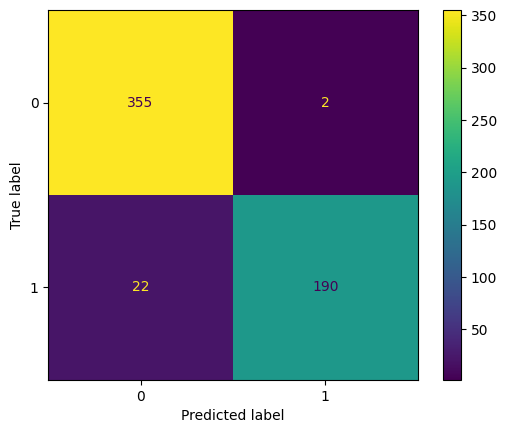

In [24]:
accuracy = np.sum(estimated_labels == targets)/len(targets)
print(f'Accuracy: {round(accuracy, 2)}')
cm = confusion_matrix(targets, estimated_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Naive bayes

- Now, let's experiment with Naive Bayes classifier:

In [27]:
X = data.iloc[:, 2:-1].values
y = data.iloc[:, -1].values

gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)

Accuracy: 0.94


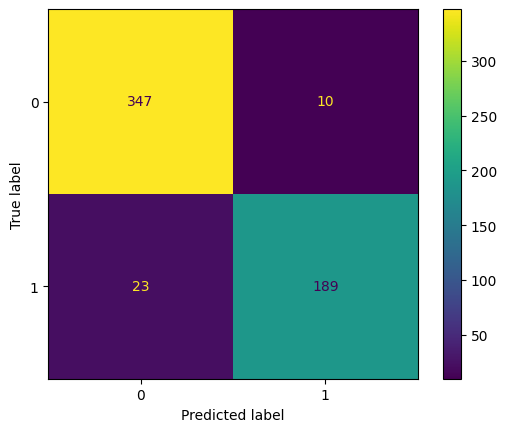

In [28]:
accuracy = np.sum(y_pred == y)/len(y)
print(f'Accuracy: {round(accuracy, 2)}')
cm2 = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

## Linear discriminant analysis

- Now, let's experiment with the built in linear discriminant analysis

In [29]:
lda = LinearDiscriminantAnalysis()

lda.fit(X, y)
lda.coef_, lda.intercept_

(array([[-4.11347895e+00,  8.58589944e-02,  4.48420336e-01,
          6.00355519e-03,  1.59968634e+00, -7.97496864e+01,
          2.64066589e+01,  4.04569128e+01,  1.94006587e+00,
          6.28275884e-01,  8.21584783e+00, -1.27660244e-01,
         -4.25383347e-01, -1.74385888e-02,  2.99470997e+02,
          1.22595530e+00, -6.73478398e+01,  1.99617187e+02,
          3.20609327e+01, -1.34988537e+02,  3.68679838e+00,
          1.35232866e-01, -4.59954756e-02, -1.91009164e-02,
          1.02539799e+01,  1.26854765e+00,  7.20029038e+00,
          8.77031250e+00,  1.05171154e+01,  8.12881481e+01]]),
 array([-47.61230334]))

Accuracy: 0.96


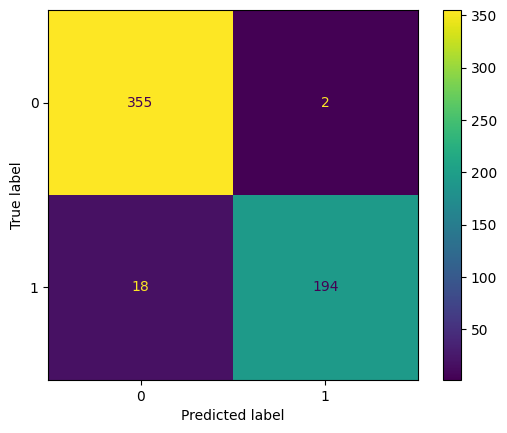

In [30]:
pred = lda.predict(X)
accuracy = np.sum(pred == y)/len(y)
print(f'Accuracy: {round(accuracy, 2)}')
cm3 = confusion_matrix(y, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()